In [1]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config import password

In [2]:
#Connect to postgresql database
connection = pg.connect(f"dbname=SQL_Homework user=postgres password={password}")

In [3]:
#Convert salaries table to dataFrame
salary_df = pd.read_sql_query('select * from salaries',connection)
salary_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
#Convert title table to dataFrame
title_df = pd.read_sql_query('select * from titles',connection)
title_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [5]:
#Used to confirm that values in both salary_df and title_current_df match,/
#by looking at the emp_no values it would appear that they do.
salary_df.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [6]:
#Sort by from_date to obtain most recent title of each employee, drop earlier titles
title_sort_df = title_df.sort_values('from_date', ascending=False)
title_current_df = title_sort_df.drop_duplicates(subset='emp_no', keep='first')
title_current_df.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [7]:
#Merge title_current_df and salary_df
merge_table = pd.merge(title_current_df, salary_df, on="emp_no")
#confirm row count
merge_table.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,259430,Senior Engineer,2002-08-01,9999-01-01,42235,1993-08-01,1994-08-01
1,101563,Senior Staff,2002-08-01,9999-01-01,45319,1997-08-01,1998-08-01
2,495525,Senior Staff,2002-08-01,9999-01-01,63658,1996-08-01,1997-08-01
3,206731,Senior Engineer,2002-08-01,9999-01-01,47835,1996-08-01,1997-08-01
4,452819,Senior Engineer,2002-08-01,9999-01-01,40000,1993-08-01,1994-08-01


In [8]:
#Filter to current employees based on to_date year 9999
merge_table_current = merge_table[merge_table['to_date_x'].astype(str).str.contains('9999')]
merge_table_current.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,52983.235491
std,161853.087323,14309.919188
min,10001.000000,40000.000000
25%,84878.750000,40000.000000
50%,249792.500000,48712.000000
75%,424895.250000,61786.000000
max,499999.000000,129492.000000


In [9]:
#Groupby title and avg salary
avg_salary_title = merge_table_current.groupby(['title']).mean()[['salary']]
avg_salary_title = avg_salary_title.sort_values(by=['salary'], ascending=False)
avg_salary_title.reset_index(level=0, inplace=True)

In [10]:
avg_salary_title

,title,salary
0,Senior Staff,58511.960170
1,Staff,58448.920003
2,Manager,49600.555556
3,Technique Leader,48532.833762
4,Engineer,48532.428751
5,Senior Engineer,48501.994322
6,Assistant Engineer,48436.856187


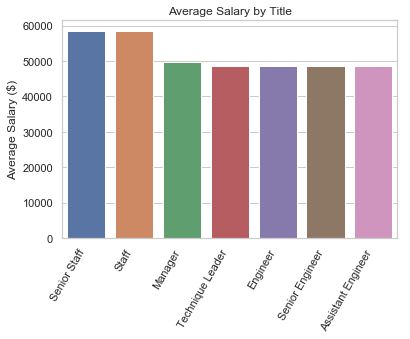

In [11]:
#Barchart
sns.set(style="whitegrid")
ax = sns.barplot(x= 'title', y="salary", data= avg_salary_title)
ax.set(xlabel = "", ylabel = "Average Salary ($)", title = "Average Salary by Title")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
plt.show()

In [12]:
figure = ax.get_figure()    
figure.savefig('Avg_Salary.png', dpi=300, bbox_inches='tight')